In [9]:
# run this if gdsCAD cannot be imported
# import sys
# !{sys.executable} -m pip install gdsCAD --prefix=. --upgrade-strategy only-if-needed
# !{sys.executable} -m pip install msgpack --prefix=. --upgrade-strategy only-if-needed
# !{sys.executable} -m pip install argparse --prefix=. --upgrade-strategy only-if-needed
# !{sys.executable} -m pip install parso --prefix=. --upgrade-strategy only-if-needed
# !{sys.executable} -m pip install Shapely --prefix=. --upgrade-strategy only-if-needed
# !{sys.executable} -m pip install Shapely --prefix=. --upgrade-strategy only-if-needed
# !{sys.executable} -m pip install descartes --prefix=. --upgrade-strategy only-if-needed
# !{sys.executable} -m pip install dxfgrabber --prefix=. --upgrade-strategy only-if-needed
# YOU MAY HAVE TO MOVE MODULE FOLDERS TO THE CURRENT DIRECTORY

In [23]:
%matplotlib notebook

In [2]:
# provide python interpreter with path to gdsCAD module
import sys
sys.path.append('/home/nanohub/jeffreyspitz99/notebooks/gdsCAD_Tool_Test/')
sys.path.append('/home/nanohub/jeffreyspitz99/notebooks/gdsCAD_Tool_Test/libpython2.7/site-packages/')

In [99]:
import os.path
from gdsCAD import *

In [100]:
import matplotlib.pyplot as plt

In [101]:
import numpy as np

In [4]:
# Create some things to draw:
amarks = templates.AlignmentMarks(('A', 'C'), (1,2))
text = shapes.Label('Hello\nworld!', 200, (0, 0))
box = shapes.Box((-500, -400), (1500, 400), 10, layer=2)

In [5]:
# Create a Cell to hold the objects
cell = core.Cell('EXAMPLE')
cell.add([text, box])
cell.add(amarks, origin=(-200, 0))
cell.add(amarks, origin=(1200, 0))


In [6]:
# Create two copies of the Cell
top = core.Cell('TOP')
cell_array = core.CellArray(cell, 1, 2, (0, 850))
top.add(cell_array)

In [7]:
# Add the copied cell to a Layout and save
layout = core.Layout('LIBRARY')
layout.add(top)
layout.save('outputTest.gds')

Writing the following cells
TOP: Cell ("TOP", 0 elements, 1 references)
EXAMPLE: Cell ("EXAMPLE", 2 elements, 2 references)
CONT_ALGN: Cell ("CONT_ALGN", 9 elements, 0 references)


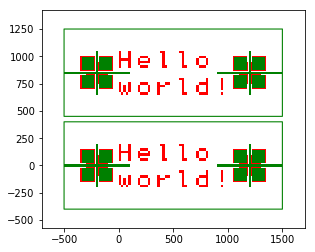

In [8]:
layout.show()

In [102]:
ourLayout = core.GdsImport('die2.GDS')

In [103]:
ourLayout.bounding_box

array([[10521.046875,   100.      ],
       [20300.      ,  9900.      ]])

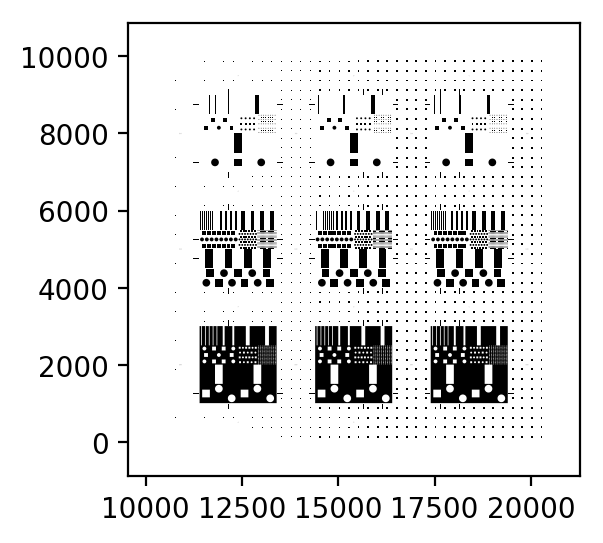

In [104]:
plt.figure(figsize=(3,3), dpi=200)
ax = ourLayout.show()
# ax.figure(figsize=(3,3),dpi=200)
# ax.show()

In [26]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [27]:
fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.gca()

ax.text(0.0,0.0,"Test", fontsize=45)
ax.axis('off')

canvas.draw()       # draw the canvas, cache the renderer

In [34]:
a = canvas.tostring_rgb()


In [35]:
image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')

In [43]:
width, height = fig.get_size_inches() * fig.get_dpi()
img = image.reshape(int(height), int(width), 3)

In [45]:
width*height*3

921600.0

<IPython.core.display.Javascript object>


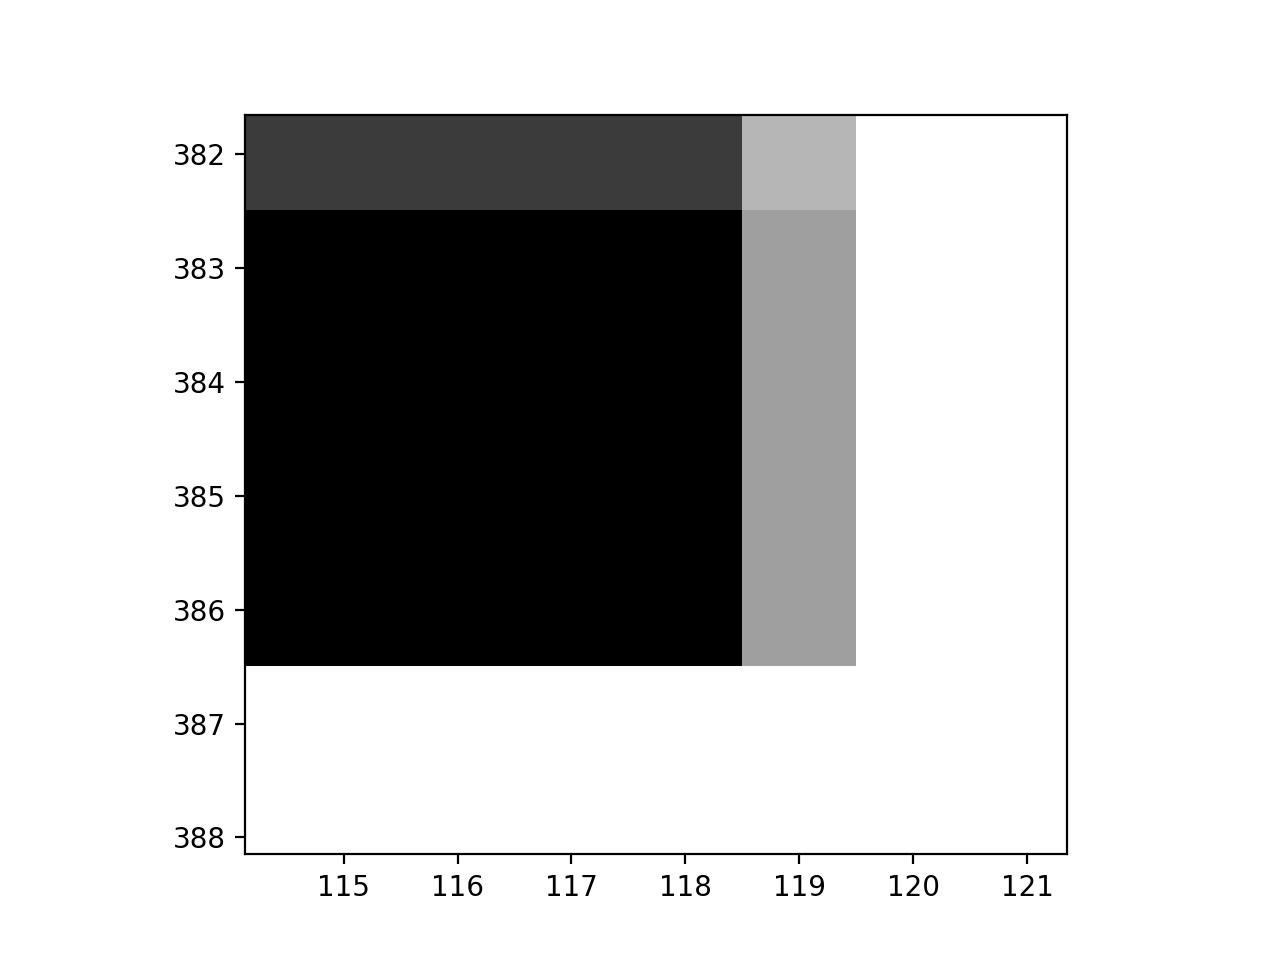

In [49]:
imgplot = plt.imshow(img)
plt.show()

In [24]:
import warnings
warnings.warn("Warning...."+str(3)+"......Message")
x = 5
x

/apps/share64/debian7/anaconda/anaconda2-5.1/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Warning....3......Message
  


5

In [7]:
import numpy as np

In [15]:
a = (1,2)

In [16]:
b = a

In [17]:
b-a

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [18]:
25%5

0

In [20]:
not 25%4

False

In [28]:
a = np.arange(0,10,1)

In [29]:
len(a)

10

In [30]:
range(len(a))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
True == ''

False

In [35]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [37]:
xx, yy = np.mgrid[-25:26, -25:26]
# circles contains the squared distance to the (100, 100) point
# we are just using the circle equation learnt at school
circle = (xx - 25) ** 2 + (yy - 25) ** 2
# donuts contains 1's and 0's organized in a donut shape
# you apply 2 thresholds on circle to define the shape
donut = np.logical_and(circle < (6400 + 60), circle > (6400 - 60))

In [40]:
circle

array([[20000, 19801, 19604, ..., 19409, 19604, 19801],
       [19801, 19602, 19405, ..., 19210, 19405, 19602],
       [19604, 19405, 19208, ..., 19013, 19208, 19405],
       ...,
       [19409, 19210, 19013, ..., 18818, 19013, 19210],
       [19604, 19405, 19208, ..., 19013, 19208, 19405],
       [19801, 19602, 19405, ..., 19210, 19405, 19602]])

In [67]:
xx, yy = np.mgrid[-25:26, -25:26]

In [68]:
circle = (xx**2 + yy**2) <= 25**2

In [69]:
circle

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

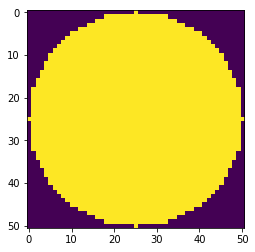

In [70]:
imgplot = plt.imshow(circle)
plt.show()

In [96]:
circle.shape

(51, 51)

In [58]:
xx

array([[-25, -25, -25, ..., -25, -25, -25],
       [-24, -24, -24, ..., -24, -24, -24],
       [-23, -23, -23, ..., -23, -23, -23],
       ...,
       [ 22,  22,  22, ...,  22,  22,  22],
       [ 23,  23,  23, ...,  23,  23,  23],
       [ 24,  24,  24, ...,  24,  24,  24]])

In [75]:
a = np.zeros((3,3))

In [77]:
a[1,1] = 1

In [78]:
a

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [84]:
b = np.pad(a, ((0,1),(0,0)),'constant')
b

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [86]:
b.shape

(4, 3)

In [87]:
np.mean(b)

0.08333333333333333

In [92]:
np.mean(b[1:3,1:3])

0.25

In [93]:
np.arange(0, 10, 1).astype(int)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [94]:
np.sum(b)

1.0

In [105]:
b

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [107]:
b[::2] = 3

In [108]:
b

array([[3., 3., 3.],
       [0., 1., 0.],
       [3., 3., 3.],
       [0., 0., 0.]])